In [1]:
from cvxpy_portfolio_optimizer.objective_function import CVaRObjectiveFunction
from cvxpy_portfolio_optimizer.effiticent_frontier import EfficientFrontier
import yfinance as yf

In [2]:
tickers = ["TSLA", "MSFT", "IBM", "GOOG", "AAPL", "AMZN", "ADBE"]
rets = yf.download(tickers, period="1y")["Adj Close"].loc[:, tickers].pct_change().iloc[1:, :].ffill()
rets

[*********************100%%**********************]  7 of 7 completed


,TSLA,MSFT,IBM,GOOG,AAPL,AMZN,ADBE
Date,,,,,,,
2022-12-02,0.000822,0.001296,-0.003285,-0.004443,-0.003371,-0.014346,-0.007498
2022-12-05,-0.063687,-0.018901,-0.008475,-0.009521,-0.007983,-0.033146,-0.021784
2022-12-06,-0.014415,-0.020304,0.000610,-0.025633,-0.025370,-0.030326,-0.008800
2022-12-07,-0.032143,-0.003060,-0.001559,-0.022197,-0.013785,0.002380,-0.013498
2022-12-08,-0.003447,0.012399,0.003463,-0.012612,0.012133,0.021366,0.018060
...,...,...,...,...,...,...,...
2023-11-27,0.002676,0.003126,0.002513,-0.001230,-0.000948,0.006747,-0.000258
2023-11-28,0.045069,0.010803,0.000514,0.004129,0.003214,-0.004738,0.006540
2023-11-29,-0.010457,-0.010060,0.004883,-0.016015,-0.005410,-0.004829,-0.009514


We will compute the efficient frontier for a portfolio where we will:
- Minimize CVaR at 95% confidence level
- Compute 100 point in the efficient frontier

In [3]:
ef = EfficientFrontier(
    returns=rets,
    objective_function=CVaRObjectiveFunction(confidence_level=0.95),
)

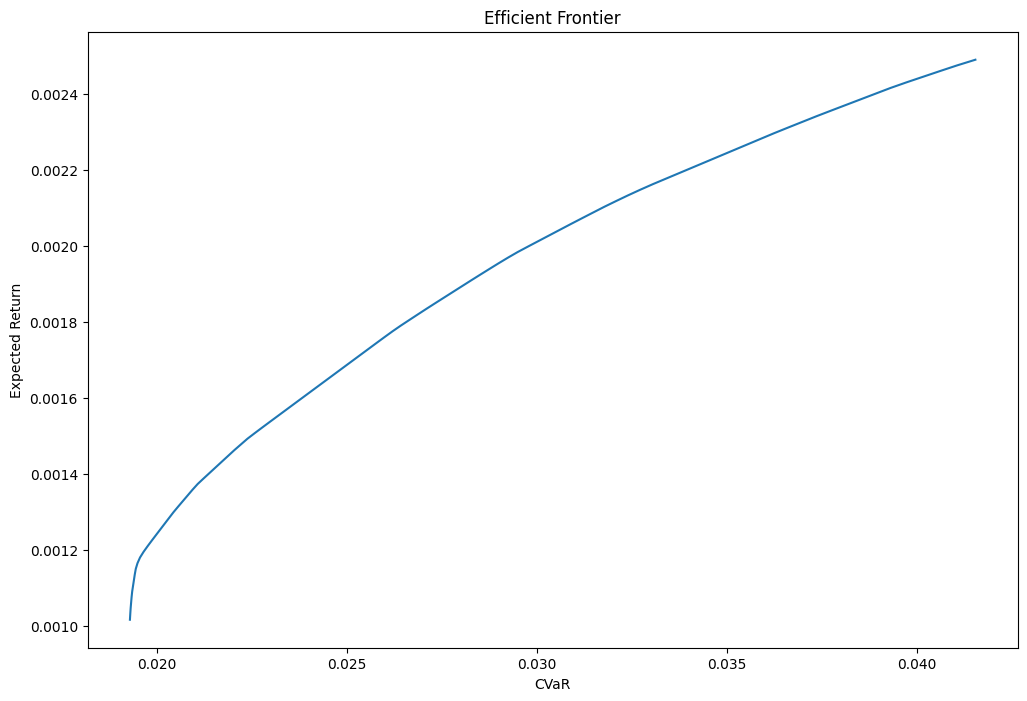

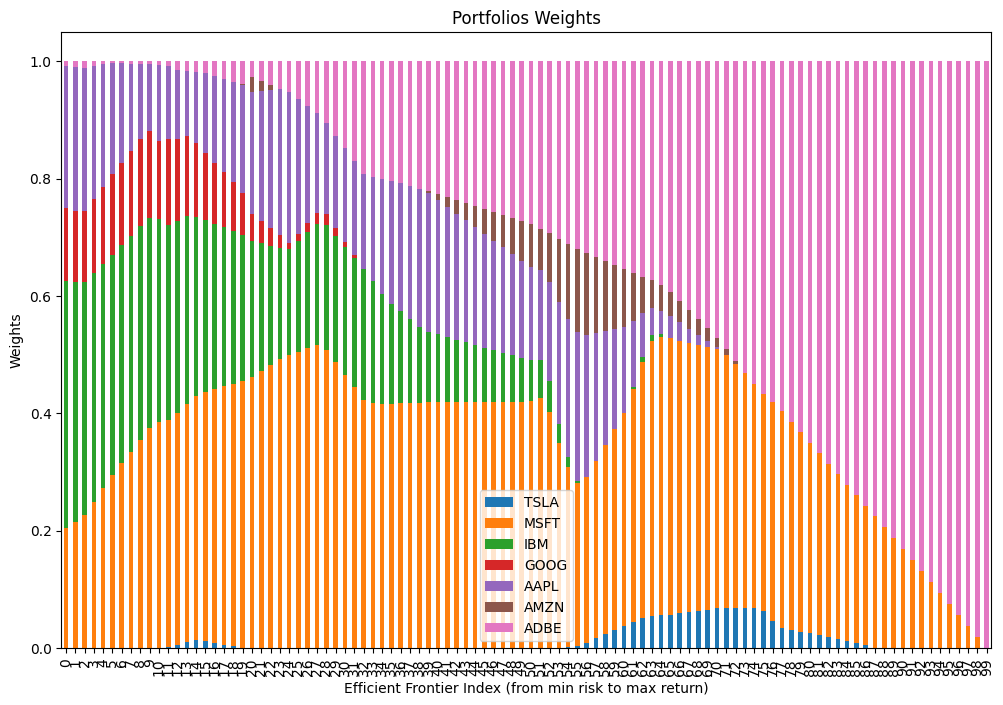

In [4]:
ef.plot_efficient_frontier(npoints=100,solver="ECOS")